In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

## Data source:https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks
(https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks)


## It is a two class classification problem:
1) positive class
2) negative class

Positive class consists of component failures for a specific component of the APS system

Negative class consists of trucks with failures for components not related to the APS.

# Metrics we are going to use:
1) Accuracy

2) AUC curve

## Data:

Training set:

1) no of datapoints 60,000

2) Positive class 1,000

3) Negavtive class 59,000


## Dealing with imbalanced data

We are going to solve the imbalanced dataset problem by using the upsampling /downsampling techniques. 

Fordownsampling there are only 1000 samples in positive class so we can get total of 2000 samples for training and this data is
very low for any model. 

So we will try to solve the problem by using the upsampling technique.

In [2]:
train_df = pd.read_csv("APS/aps_failure_training_set.csv",error_bad_lines=False)
test_df = pd.read_csv("APS/aps_failure_test_set.csv",error_bad_lines=False)
print(train_df.shape)
print(test_df.shape)

(60000, 171)
(16000, 171)


In [3]:
train_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,...,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,...,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,...,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,...,0,2578,76,62,0,0,0,0,0,0,0,0,232,0,0,2014,370,48,18,15740,1822,20174,44,0,0,0,1.08,54,5670,1566,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,0,43752,1966618,1800340,131646,4588,0,1974038,0,226,0,0,0,3230626,2618878,1058136,551022,0,0,0,0,1788,642,0,0,0,0,42124,372236,2128914,...,0,3590004,2026,444,0,0,0,0,0,0,0,0,44946,62648,11506,0,0,149474,35154,457040,80482,98334,27588,0,0,21173050,1116.06,1176,404740,904230,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [5]:
test_df.head()


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,2682,4736,3862,1846,0,0,0,3976,0,0,0,1520,2374,11516,9480,111258,470,0,0,0,0,58,26,0,0,0,0,0,0,0,...,0,6598,70,112,0,0,0,0,0,0,0,0,340,0,0,1100,574,232,66,780,882,0,4,0,0,0,465.5,90,7502,3156,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,0,748,12594,3636,0,0,0,5244,0,60,0,0,0,23174,18166,23686,1270,0,0,0,0,12,82,0,0,0,0,0,0,0,...,0,7918,78,40,0,0,0,0,0,0,0,0,352,0,0,3996,584,200,62,37580,3756,6368,36,0,0,0,2.86,102,10040,3310,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,199486,1358536,1952422,452706,25130,520,0,1891670,0,0,0,77898,110548,3605894,3291610,959756,286536,0,0,0,0,106,340,0,0,0,0,0,24286,681260,...,0,3613906,4218,692,0,0,0,0,0,0,0,0,25278,9438,2504,10262714,1278664,109700,19072,9520,4902,4434614,70900,0,0,26002880,2057.84,2158,396312,538136,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,0,123922,984314,1680050,1135268,92606,14038,1772828,0,0,0,1116,2372,3546760,3053176,652616,423374,0,0,7274,0,1622,432,0,0,0,0,0,6388,1091104,...,46,3413978,2924,414,0,0,60,38710,0,0,0,0,27740,33354,6330,0,0,133542,21290,2718360,435370,0,0,0,0,1179900,1541.32,1678,659550,691580,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,0,72,17926,82834,3114,0,0,48978,0,0,0,0,0,97146,89920,12932,5092,0,0,0,0,102,50,0,0,0,0,0,11544,73570,...,0,95372,78,36,0,0,0,0,0,0,0,0,538,360,142,0,0,1822,344,2140,394,13664,110,0,0,813740,113.86,52,10216,9958,7646,4144,18466,49782,3176,482,76,0,0,0


## Replacing na with NaN
Here we are going to replace the "na" values with NaN to represent as the particular data fields are empty.

We are changing the negative class as 0 and positive class as 1

In [6]:
train_df['class'] = train_df['class'].map({'neg':0,'pos':1})
train_df = train_df.replace(['na'],np.nan)
#For test data
test_df['class'] = test_df['class'].map({'neg':0,'pos':1})
test_df = test_df.replace(['na'],np.nan)

In [7]:
train_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,NaN,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,...,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,NaN,0,NaN,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,...,NaN,NaN,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,NaN,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,...,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,0,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,...,0,2578,76,62,0,0,0,0,0,0,0,0,232,0,0,2014,370,48,18,15740,1822,20174,44,0,0,0,1.08,54,5670,1566,240,46,58,44,10,0,0,0,4,32
4,0,60874,NaN,1368,458,0,0,0,0,0,0,43752,1966618,1800340,131646,4588,0,1974038,0,226,0,0,0,3230626,2618878,1058136,551022,0,0,0,0,1788,642,0,0,0,0,42124,372236,2128914,...,0,3590004,2026,444,0,0,0,0,0,0,0,0,44946,62648,11506,0,0,149474,35154,457040,80482,98334,27588,0,0,21173050,1116.06,1176,404740,904230,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [8]:
test_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,60,0,20,12,0,0,0,0,0,2682,4736,3862,1846,0,0,0,3976,0,0,0,1520,2374,11516,9480,111258,470,0,0,0,0,58,26,0,0,0,0,0,0,0,...,0,6598,70,112,0,0,0,0,0,0,0,0,340,0,0,1100,574,232,66,780,882,0,4,0,0,0,465.5,90,7502,3156,1098,138,412,654,78,88,0,0,0,0
1,0,82,0,68,40,0,0,0,0,0,0,748,12594,3636,0,0,0,5244,0,60,0,0,0,23174,18166,23686,1270,0,0,0,0,12,82,0,0,0,0,0,0,0,...,0,7918,78,40,0,0,0,0,0,0,0,0,352,0,0,3996,584,200,62,37580,3756,6368,36,0,0,0,2.86,102,10040,3310,1068,276,1620,116,86,462,0,0,0,0
2,0,66002,2,212,112,0,0,0,0,0,199486,1358536,1952422,452706,25130,520,0,1891670,0,0,0,77898,110548,3605894,3291610,959756,286536,0,0,0,0,106,340,0,0,0,0,0,24286,681260,...,0,3613906,4218,692,0,0,0,0,0,0,0,0,25278,9438,2504,10262714,1278664,109700,19072,9520,4902,4434614,70900,0,0,26002880,2057.84,2158,396312,538136,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,0,59816,NaN,1010,936,0,0,0,0,0,0,123922,984314,1680050,1135268,92606,14038,1772828,0,0,0,1116,2372,3546760,3053176,652616,423374,0,0,7274,0,1622,432,0,0,0,0,0,6388,1091104,...,46,3413978,2924,414,0,0,60,38710,0,0,0,0,27740,33354,6330,0,0,133542,21290,2718360,435370,0,0,0,0,1179900,1541.32,1678,659550,691580,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,0,1814,NaN,156,140,0,0,0,0,0,0,72,17926,82834,3114,0,0,48978,0,0,0,0,0,97146,89920,12932,5092,0,0,0,0,102,50,0,0,0,0,0,11544,73570,...,0,95372,78,36,0,0,0,0,0,0,0,0,538,360,142,0,0,1822,344,2140,394,13664,110,0,0,813740,113.86,52,10216,9958,7646,4144,18466,49782,3176,482,76,0,0,0


In [9]:
train_df['class'].value_counts()

0    59000
1     1000
Name: class, dtype: int64

## Separating X(input) and Y(target)

In [10]:
train_x = train_df.drop('class',axis=1)
train_y = train_df['class']

In [11]:
train_x.shape

(60000, 170)

In [12]:
train_y.shape

(60000,)

In [13]:
train_x.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,NaN,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,...,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,33058,NaN,0,NaN,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,...,NaN,NaN,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,41040,NaN,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,...,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,2038,...,0,2578,76,62,0,0,0,0,0,0,0,0,232,0,0,2014,370,48,18,15740,1822,20174,44,0,0,0,1.08,54,5670,1566,240,46,58,44,10,0,0,0,4,32
4,60874,NaN,1368,458,0,0,0,0,0,0,43752,1966618,1800340,131646,4588,0,1974038,0,226,0,0,0,3230626,2618878,1058136,551022,0,0,0,0,1788,642,0,0,0,0,42124,372236,2128914,819596,...,0,3590004,2026,444,0,0,0,0,0,0,0,0,44946,62648,11506,0,0,149474,35154,457040,80482,98334,27588,0,0,21173050,1116.06,1176,404740,904230,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [14]:
test_x = test_df.drop('class',axis=1)
test_y = test_df['class']

In [15]:
test_x.shape

(16000, 170)

In [16]:
test_y.shape

(16000,)

In [17]:
test_x.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,60,0,20,12,0,0,0,0,0,2682,4736,3862,1846,0,0,0,3976,0,0,0,1520,2374,11516,9480,111258,470,0,0,0,0,58,26,0,0,0,0,0,0,0,0,...,0,6598,70,112,0,0,0,0,0,0,0,0,340,0,0,1100,574,232,66,780,882,0,4,0,0,0,465.5,90,7502,3156,1098,138,412,654,78,88,0,0,0,0
1,82,0,68,40,0,0,0,0,0,0,748,12594,3636,0,0,0,5244,0,60,0,0,0,23174,18166,23686,1270,0,0,0,0,12,82,0,0,0,0,0,0,0,692,...,0,7918,78,40,0,0,0,0,0,0,0,0,352,0,0,3996,584,200,62,37580,3756,6368,36,0,0,0,2.86,102,10040,3310,1068,276,1620,116,86,462,0,0,0,0
2,66002,2,212,112,0,0,0,0,0,199486,1358536,1952422,452706,25130,520,0,1891670,0,0,0,77898,110548,3605894,3291610,959756,286536,0,0,0,0,106,340,0,0,0,0,0,24286,681260,2808472,...,0,3613906,4218,692,0,0,0,0,0,0,0,0,25278,9438,2504,10262714,1278664,109700,19072,9520,4902,4434614,70900,0,0,26002880,2057.84,2158,396312,538136,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,59816,NaN,1010,936,0,0,0,0,0,0,123922,984314,1680050,1135268,92606,14038,1772828,0,0,0,1116,2372,3546760,3053176,652616,423374,0,0,7274,0,1622,432,0,0,0,0,0,6388,1091104,2930694,...,46,3413978,2924,414,0,0,60,38710,0,0,0,0,27740,33354,6330,0,0,133542,21290,2718360,435370,0,0,0,0,1179900,1541.32,1678,659550,691580,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,1814,NaN,156,140,0,0,0,0,0,0,72,17926,82834,3114,0,0,48978,0,0,0,0,0,97146,89920,12932,5092,0,0,0,0,102,50,0,0,0,0,0,11544,73570,3662,...,0,95372,78,36,0,0,0,0,0,0,0,0,538,360,142,0,0,1822,344,2140,394,13664,110,0,0,813740,113.86,52,10216,9958,7646,4144,18466,49782,3176,482,76,0,0,0


# Replacing the null values with median values

In [18]:
train_x.fillna(train_x.median(),inplace=True)
test_x.fillna(test_x.median(),inplace=True)

In [20]:
train_x.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,0,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,...,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,33058,0,0,126,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,...,0,1.73447e+06,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,41040,0,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,...,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,2038,...,0,2578,76,62,0,0,0,0,0,0,0,0,232,0,0,2014,370,48,18,15740,1822,20174,44,0,0,0,1.08,54,5670,1566,240,46,58,44,10,0,0,0,4,32
4,60874,0,1368,458,0,0,0,0,0,0,43752,1966618,1800340,131646,4588,0,1974038,0,226,0,0,0,3230626,2618878,1058136,551022,0,0,0,0,1788,642,0,0,0,0,42124,372236,2128914,819596,...,0,3590004,2026,444,0,0,0,0,0,0,0,0,44946,62648,11506,0,0,149474,35154,457040,80482,98334,27588,0,0,21173050,1116.06,1176,404740,904230,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [21]:
test_x.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,60,0,20,12,0,0,0,0,0,2682,4736,3862,1846,0,0,0,3976,0,0,0,1520,2374,11516,9480,111258,470,0,0,0,0,58,26,0,0,0,0,0,0,0,0,...,0,6598,70,112,0,0,0,0,0,0,0,0,340,0,0,1100,574,232,66,780,882,0,4,0,0,0,465.5,90,7502,3156,1098,138,412,654,78,88,0,0,0,0
1,82,0,68,40,0,0,0,0,0,0,748,12594,3636,0,0,0,5244,0,60,0,0,0,23174,18166,23686,1270,0,0,0,0,12,82,0,0,0,0,0,0,0,692,...,0,7918,78,40,0,0,0,0,0,0,0,0,352,0,0,3996,584,200,62,37580,3756,6368,36,0,0,0,2.86,102,10040,3310,1068,276,1620,116,86,462,0,0,0,0
2,66002,2,212,112,0,0,0,0,0,199486,1358536,1952422,452706,25130,520,0,1891670,0,0,0,77898,110548,3605894,3291610,959756,286536,0,0,0,0,106,340,0,0,0,0,0,24286,681260,2808472,...,0,3613906,4218,692,0,0,0,0,0,0,0,0,25278,9438,2504,10262714,1278664,109700,19072,9520,4902,4434614,70900,0,0,26002880,2057.84,2158,396312,538136,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,59816,0,1010,936,0,0,0,0,0,0,123922,984314,1680050,1135268,92606,14038,1772828,0,0,0,1116,2372,3546760,3053176,652616,423374,0,0,7274,0,1622,432,0,0,0,0,0,6388,1091104,2930694,...,46,3413978,2924,414,0,0,60,38710,0,0,0,0,27740,33354,6330,0,0,133542,21290,2718360,435370,0,0,0,0,1179900,1541.32,1678,659550,691580,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,1814,0,156,140,0,0,0,0,0,0,72,17926,82834,3114,0,0,48978,0,0,0,0,0,97146,89920,12932,5092,0,0,0,0,102,50,0,0,0,0,0,11544,73570,3662,...,0,95372,78,36,0,0,0,0,0,0,0,0,538,360,142,0,0,1822,344,2140,394,13664,110,0,0,813740,113.86,52,10216,9958,7646,4144,18466,49782,3176,482,76,0,0,0


# Normalizing the dataset
We have observed that some features have values with large differences. so we are going to normalize the data using minmax
normalization technique

In [22]:
scaler = MinMaxScaler()
train_x1 = scaler.fit_transform(train_x)
test_x1 = scaler.fit_transform(test_x)

# Reducing the dimensionality Using PCA
## Plotting the explained variance

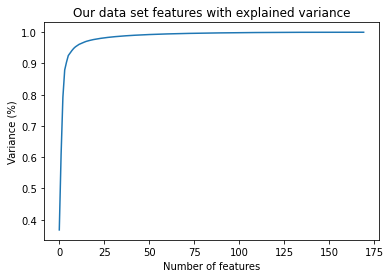

In [23]:
pca = PCA()
pca_result = pca.fit(train_x1)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of features')
plt.ylabel('Variance (%)') #for each component
plt.title('Our data set features with explained variance')
plt.show()

In [24]:
sum1 = 0
variance = pca.explained_variance_ratio_
for i in range(len(pca.explained_variance_ratio_)):
  sum1 = sum1+variance[i]
  if(sum1>0.99):
    components = i
    break

print(components)

41


### We found that 41 features can explain the variance of 99%. So we chose the 41 features from 171 features

In [25]:
pca = PCA(components)
train_x2 = pca.fit_transform(train_x1)
test_x2 = pca.fit_transform(test_x1)

In [26]:
train = pd.DataFrame(train_x2)
train['class'] = train_y
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,class
0,-0.152372,0.340742,0.787833,0.139615,-0.116926,0.028574,-0.001728,-0.002072,-0.058384,-0.023258,-0.008273,0.018986,-0.021638,-0.013719,-0.043279,-0.003866,-0.031652,-0.016758,0.011967,0.012814,0.025800,-0.007898,0.002039,-0.000327,0.000464,0.020809,0.015544,0.000192,-0.019147,0.010752,-0.009234,-0.020945,0.011455,0.004656,-0.000861,0.003318,-0.009862,-0.012835,-0.005124,-0.000984,0.002408,0
1,0.007375,0.161099,-0.152742,-0.144396,0.301564,0.633855,-0.009960,-0.036029,0.045083,-0.021330,0.006600,0.005074,-0.020692,0.026670,-0.000771,0.009113,-0.007286,0.022787,0.004765,-0.000139,0.008813,0.004166,0.000007,0.002373,0.000591,-0.010833,-0.004584,-0.003033,0.004216,0.005393,0.005887,0.003493,-0.010905,-0.005394,-0.000645,-0.007034,-0.000724,-0.001479,0.000584,0.000397,0.000826,0
2,-0.122264,-0.210570,-0.153741,-0.032026,0.068168,-0.050925,-0.013803,0.000246,-0.008915,0.003765,-0.021573,-0.016787,0.016804,0.023580,-0.003881,-0.007083,-0.009836,0.004320,0.000975,0.000524,0.003089,-0.002551,-0.001670,-0.006789,-0.000735,-0.001384,0.003465,0.001666,-0.006701,0.000054,0.000911,-0.008271,0.005487,0.002339,-0.000309,0.000366,-0.002845,-0.001744,0.004778,-0.001452,-0.000670,0
3,-0.081882,-0.472011,-0.118393,-0.048305,0.008489,-0.009259,-0.006908,-0.004485,0.008065,-0.001829,0.003310,0.005389,-0.005957,-0.000838,0.003918,0.002898,0.002794,-0.000275,-0.001965,-0.001059,0.000331,0.001139,-0.000137,0.002749,0.000346,0.000551,-0.002330,-0.001468,-0.000419,-0.000526,-0.000417,-0.000022,0.001308,0.000365,-0.000304,0.000283,-0.000441,-0.000213,-0.000745,0.001130,0.000782,0
4,-0.051278,0.274250,-0.192845,-0.051582,-0.073095,0.042317,0.028525,0.012832,-0.022150,-0.009928,-0.004436,0.013004,-0.039269,0.012545,-0.036303,-0.001849,-0.015303,0.004509,0.000384,0.005639,-0.001768,0.004234,0.005261,-0.010079,0.003080,0.012625,0.006722,0.007074,0.002293,-0.010524,0.015036,0.001737,-0.002683,-0.003675,0.003491,0.003662,0.003153,-0.005019,-0.017984,-0.006770,-0.002870,0


In [27]:
test = pd.DataFrame(test_x2)
test['class'] = test_y
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,class
0,-0.075646,-0.344069,-0.144441,-0.063928,-0.015194,0.008094,0.003944,0.017729,0.007608,-0.009180,0.003892,0.017180,0.030006,-0.058475,-0.036822,0.007734,0.002955,-0.009335,0.012554,-0.009007,-0.008200,-0.002511,-0.000263,-0.002698,-0.000284,0.001254,0.000608,-0.003871,0.004657,0.002993,-0.000979,0.002587,-0.000407,0.000513,-0.000752,0.001429,-0.007944,0.001519,-0.003839,0.004645,0.000145,0
1,-0.073510,-0.444715,-0.137871,-0.052594,0.002097,0.010555,0.003814,0.012091,-0.002587,-0.006562,0.005742,0.001628,0.012568,-0.007581,-0.005496,0.002587,0.000596,-0.002888,-0.001086,-0.003580,-0.005975,-0.006657,0.003385,-0.000347,-0.000700,-0.000039,0.000478,0.000072,-0.000185,0.000982,0.001107,-0.001049,0.000836,-0.000851,0.001084,0.000103,-0.002663,0.002327,-0.001719,0.000383,-0.000006,0
2,-0.085769,0.658511,-0.209267,-0.122313,-0.046648,-0.062115,-0.053596,-0.045693,0.066389,0.030871,0.020272,0.042687,-0.004529,0.030086,-0.019608,0.006653,-0.030893,-0.007611,-0.036991,0.002878,-0.015608,-0.028617,0.011307,0.051421,-0.006754,0.000182,0.021135,0.003670,0.008630,-0.017466,0.002227,0.006946,0.018075,-0.003762,-0.013807,0.012992,0.036946,0.024737,-0.004645,0.003966,0.002756,0
3,-0.122558,0.151289,-0.185489,-0.045443,0.016286,0.035681,0.010163,-0.020259,0.018633,0.011616,-0.021836,-0.021609,-0.005496,-0.001984,0.012411,0.025101,0.027569,0.017454,0.000557,-0.005717,0.022664,0.045266,-0.025836,0.003258,0.009865,0.004029,-0.004993,0.004171,0.013793,0.002636,-0.002659,-0.010730,0.010836,-0.005007,0.000456,-0.003740,0.000489,-0.006166,-0.002970,-0.003753,-0.006896,0
4,-0.075372,-0.373711,-0.141797,-0.065045,0.005820,0.007792,0.004276,0.012155,-0.003101,-0.004847,0.007067,-0.001713,0.007087,0.008287,0.002670,0.000893,-0.000329,-0.000938,-0.005537,-0.001556,-0.005869,-0.008652,0.004859,0.000041,-0.001013,0.000039,0.000478,0.001492,-0.001646,0.000397,0.001490,-0.002325,0.000290,-0.001451,0.001407,-0.000133,-0.001861,0.002311,-0.000357,-0.001036,0.000527,0


## Combining train and test data for upsampling


In [28]:
data = pd.concat([train, test])
data.shape

(76000, 42)

In [29]:
neg_len = len(data[data['class']==0])
pos_len = len(data[data['class']==1])
print(neg_len)
print(pos_len)

74625
1375


#### In whole train and test data we have 74625 samples as negative class and 1375 samples as positive class. So we are
going to upsample the positive points to make them equal to the negative class
#### Imbalanced dataset so we are upsampling the dataset

In [31]:
# Separate majority and minority classes
df_majority = data[data['class']==0]
df_minority = data[data['class']==1]
# Downsample majority class
df_majority_upsampled = resample(df_minority,
                                 replace=True, # sample without replacement
                                 n_samples=neg_len, # to match majority class
                                 random_state=123) # reproducible results
# Combine minority class with downsampled majority class
df_upsampled = pd.concat([df_majority, df_majority_upsampled])

In [32]:
df_upsampled['class'].value_counts()

1    74625
0    74625
Name: class, dtype: int64

### Here after upsampling we have equal number of samples for both classes

In [33]:
df_upsampled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,class
0,-0.152372,0.340742,0.787833,0.139615,-0.116926,0.028574,-0.001728,-0.002072,-0.058384,-0.023258,-0.008273,0.018986,-0.021638,-0.013719,-0.043279,-0.003866,-0.031652,-0.016758,0.011967,0.012814,0.025800,-0.007898,0.002039,-0.000327,0.000464,0.020809,0.015544,0.000192,-0.019147,0.010752,-0.009234,-0.020945,0.011455,0.004656,-0.000861,0.003318,-0.009862,-0.012835,-0.005124,-0.000984,0.002408,0
1,0.007375,0.161099,-0.152742,-0.144396,0.301564,0.633855,-0.009960,-0.036029,0.045083,-0.021330,0.006600,0.005074,-0.020692,0.026670,-0.000771,0.009113,-0.007286,0.022787,0.004765,-0.000139,0.008813,0.004166,0.000007,0.002373,0.000591,-0.010833,-0.004584,-0.003033,0.004216,0.005393,0.005887,0.003493,-0.010905,-0.005394,-0.000645,-0.007034,-0.000724,-0.001479,0.000584,0.000397,0.000826,0
2,-0.122264,-0.210570,-0.153741,-0.032026,0.068168,-0.050925,-0.013803,0.000246,-0.008915,0.003765,-0.021573,-0.016787,0.016804,0.023580,-0.003881,-0.007083,-0.009836,0.004320,0.000975,0.000524,0.003089,-0.002551,-0.001670,-0.006789,-0.000735,-0.001384,0.003465,0.001666,-0.006701,0.000054,0.000911,-0.008271,0.005487,0.002339,-0.000309,0.000366,-0.002845,-0.001744,0.004778,-0.001452,-0.000670,0
3,-0.081882,-0.472011,-0.118393,-0.048305,0.008489,-0.009259,-0.006908,-0.004485,0.008065,-0.001829,0.003310,0.005389,-0.005957,-0.000838,0.003918,0.002898,0.002794,-0.000275,-0.001965,-0.001059,0.000331,0.001139,-0.000137,0.002749,0.000346,0.000551,-0.002330,-0.001468,-0.000419,-0.000526,-0.000417,-0.000022,0.001308,0.000365,-0.000304,0.000283,-0.000441,-0.000213,-0.000745,0.001130,0.000782,0
4,-0.051278,0.274250,-0.192845,-0.051582,-0.073095,0.042317,0.028525,0.012832,-0.022150,-0.009928,-0.004436,0.013004,-0.039269,0.012545,-0.036303,-0.001849,-0.015303,0.004509,0.000384,0.005639,-0.001768,0.004234,0.005261,-0.010079,0.003080,0.012625,0.006722,0.007074,0.002293,-0.010524,0.015036,0.001737,-0.002683,-0.003675,0.003491,0.003662,0.003153,-0.005019,-0.017984,-0.006770,-0.002870,0


In [34]:
df_x = df_upsampled.drop('class',axis=1)
df_y = df_upsampled['class']

In [36]:
df_x.shape

(149250, 41)

In [37]:
df_y.shape

(149250,)

## Splitting the dataset randomly Train,Test,Val

In [39]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)
print("x_tr shape", x_train.shape)
print("y_tr shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_tr shape (99997, 41)
y_tr shape (99997,)
x_test shape (49253, 41)
y_test shape (49253,)


In [42]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_val shape", x_val.shape)
print("y_val shape", y_val.shape)

x_train shape (79997, 41)
y_train shape (79997,)
x_val shape (20000, 41)
y_val shape (20000,)


##  Applying Machine learning models

## Logistic Regression

In [43]:
params = {'C':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],'penalty':['l1','l2']}
lr = LogisticRegression()
grid = GridSearchCV(lr, param_grid=params, cv=5, scoring="accuracy", n_jobs=-1)
grid.fit(x_train,y_train)
grid.best_params_

{'C': 100, 'penalty': 'l2'}

In [45]:
logit = LogisticRegression(C=100, penalty='l2')
logit.fit(x_train, y_train)
y_train_pred = logit.predict(x_train)
y_val_pred = logit.predict(x_val)
y_test_pred = logit.predict(x_test)

In [46]:
print("Train accuracy : ", accuracy_score(y_train, y_train_pred))
print("Test accuracy : ", accuracy_score(y_test, y_test_pred))
print("validation accuracy : ", accuracy_score(y_val, y_val_pred))

Train accuracy :  0.9385601960073503
Test accuracy :  0.9395975879641849
validation accuracy :  0.94145


In [47]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[23666   907]
 [ 2068 22612]]


## ROC curve


AUC: 0.978


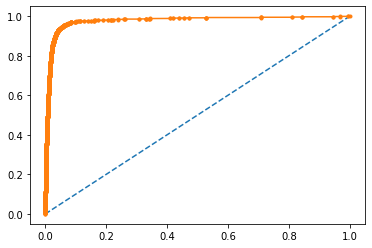

In [48]:
y_prob = logit.predict_proba(x_test)
y_prob = y_prob[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, y_prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Random Forest Classifier

In [49]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_train_pred = rf.predict(x_train)
y_val_pred = rf.predict(x_val)
y_test_pred = rf.predict(x_test)

In [50]:
print("Train accuracy : ", accuracy_score(y_train, y_train_pred))
print("Test accuracy : ", accuracy_score(y_test, y_test_pred))
print("validation accuracy : ", accuracy_score(y_val, y_val_pred))

Train accuracy :  1.0
Test accuracy :  0.9967920735792744
validation accuracy :  0.99685


In [51]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[24415   158]
 [    0 24680]]


AUC: 1.00000


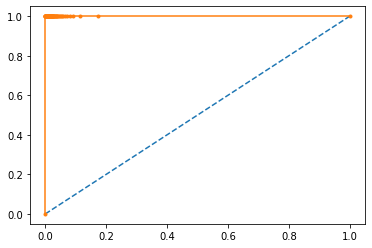

In [52]:
y_prob = rf.predict_proba(x_test)
y_prob = y_prob[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, y_prob)
print('AUC: %.5f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## XGBoost Classifier

In [53]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_train_pred = xgb.predict(x_train)
y_val_pred = xgb.predict(x_val)
y_test_pred = xgb.predict(x_test)
print("Train accuracy : ", accuracy_score(y_train, y_train_pred))
print("Test accuracy : ", accuracy_score(y_test, y_test_pred))
print("validation accuracy : ", accuracy_score(y_val, y_val_pred))

Train accuracy :  0.9686113229246097
Test accuracy :  0.9691795423629017
validation accuracy :  0.96975


In [54]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)


[[23508  1065]
 [  453 24227]]





AUC: 0.99234


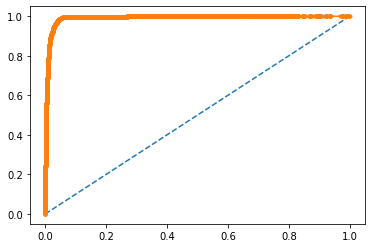

In [55]:
print("\n\n")
y_prob = xgb.predict_proba(x_test)
y_prob = y_prob[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, y_prob)
print('AUC: %.5f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## KNN Classifier

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_train_pred = knn.predict(x_train)
y_val_pred = knn.predict(x_val)
y_test_pred = knn.predict(x_test)
print("Train accuracy : ", accuracy_score(y_train, y_train_pred))
print("Test accuracy : ", accuracy_score(y_test, y_test_pred))
print("validation accuracy : ", accuracy_score(y_val, y_val_pred))

Train accuracy :  0.9924997187394528
Test accuracy :  0.9901934907518324
validation accuracy :  0.9901


In [57]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[24090   483]
 [    0 24680]]


AUC: 0.99589


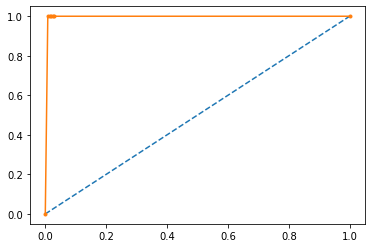

In [59]:
y_prob = knn.predict_proba(x_test)
y_prob = y_prob[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, y_prob)
print('AUC: %.5f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## BaggingClassifier

In [60]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier()
bag.fit(x_train, y_train)
y_train_pred = bag.predict(x_train)
y_val_pred = bag.predict(x_val)
y_test_pred = bag.predict(x_test)
print("Train accuracy : ", accuracy_score(y_train, y_train_pred))
print("Test accuracy : ", accuracy_score(y_test, y_test_pred))
print("validation accuracy : ", accuracy_score(y_val, y_val_pred))

Train accuracy :  0.9998999962498594
Test accuracy :  0.995309930359572
validation accuracy :  0.99555


In [61]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)


[[24342   231]
 [    0 24680]]


In [63]:

y_prob = bag.predict_proba(x_test)
y_prob = y_prob[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, y_prob)
print('AUC: %.5f' % auc)

AUC: 0.99978


## ExtraTreesClassifier

In [64]:
from sklearn.ensemble import ExtraTreesClassifier
extra = ExtraTreesClassifier()
extra.fit(x_train, y_train)
y_train_pred = extra.predict(x_train)
y_val_pred = extra.predict(x_val)
y_test_pred = extra.predict(x_test)
print("Train accuracy : ", accuracy_score(y_train, y_train_pred))
print("Test accuracy : ", accuracy_score(y_test, y_test_pred))
print("validation accuracy : ", accuracy_score(y_val, y_val_pred))

Train accuracy :  1.0
Test accuracy :  0.9984772501167442
validation accuracy :  0.99845


In [65]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)


[[24498    75]
 [    0 24680]]


In [66]:

y_prob = extra.predict_proba(x_test)
y_prob = y_prob[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, y_prob)
print('AUC: %.5f' % auc)

AUC: 1.00000


## AdaBoostClassifier

In [67]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()
adaboost.fit(x_train, y_train)
y_train_pred = adaboost.predict(x_train)
y_val_pred = adaboost.predict(x_val)
y_test_pred = adaboost.predict(x_test)
print("Train accuracy : ", accuracy_score(y_train, y_train_pred))
print("Test accuracy : ", accuracy_score(y_test, y_test_pred))
print("validation accuracy : ", accuracy_score(y_val, y_val_pred))

Train accuracy :  0.9498731202420091
Test accuracy :  0.9509471504273851
validation accuracy :  0.95255


In [68]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)



[[23321  1252]
 [ 1164 23516]]


In [69]:
y_prob = adaboost.predict_proba(x_test)
y_prob = y_prob[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, y_prob)
print('AUC: %.5f' % auc)

AUC: 0.98674


## GradientBoostingClassifier

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_train_pred = gb.predict(x_train)
y_val_pred = gb.predict(x_val)
y_test_pred = gb.predict(x_test)
print("Train accuracy : ", accuracy_score(y_train, y_train_pred))
print("Test accuracy : ", accuracy_score(y_test, y_test_pred))
print("validation accuracy : ", accuracy_score(y_val, y_val_pred))

Train accuracy :  0.9702113829268597
Test accuracy :  0.9704789555966135
validation accuracy :  0.97135


In [71]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)


[[23475  1098]
 [  356 24324]]


In [73]:

y_prob = gb.predict_proba(x_test)
y_prob = y_prob[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, y_prob)
print('AUC: %.5f' % auc)

AUC: 0.99170


# Winners

## 1) Random Forest Classifier
## 2) Bagging Classifier
## 3) KNN Classifier